#### Importacion de librerías

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#### Carga de datos

In [2]:
df_USArrests = pd.read_csv('USArrests.csv')
df_USArrests.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Pruebas de gráficas

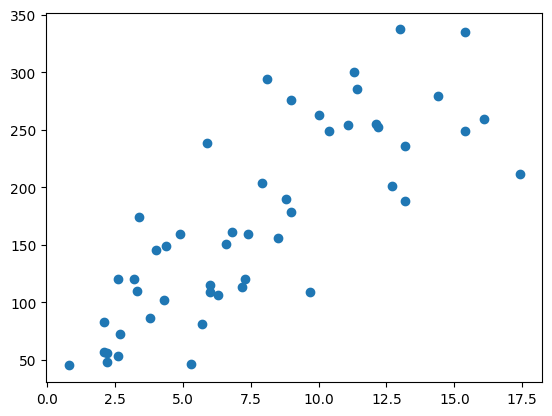

In [6]:
plt.scatter(df_USArrests['Murder'], df_USArrests['Assault'])

#### Uso de KMeans

##### Con datos sin normalizar

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42) # Crear instancia de KMeans con 4 clusters y semilla 42
kmeans.fit(df_USArrests.iloc[:, 1:])    # Ajustar el modelo KMeans a los datos (sin la columna 'State')
df_USArrests['cluster'] = kmeans.labels_ # Añadir las etiquetas de los clusters al DataFrame escalado

df_USArrests.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


Graficamos incluyendo el color de cada cluster

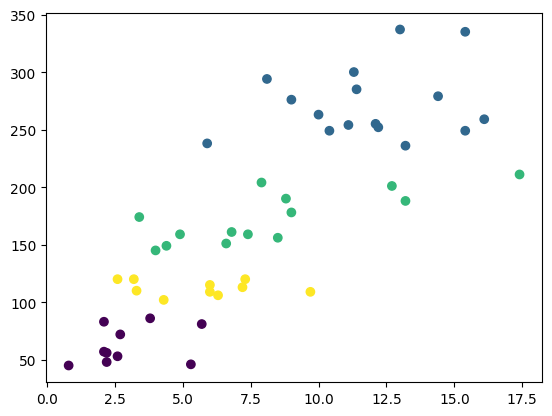

In [27]:
plt.scatter(df_USArrests['Murder'], df_USArrests['Assault'], c=df_USArrests['cluster'])

##### Con datos normalizados

Normalización llevando media a 0 y desv. est. a 1

In [25]:
scaler = StandardScaler()
df_USArrests_scaled = scaler.fit_transform(df_USArrests.iloc[:, 1:-1])
df_USArrests_scaled = pd.DataFrame(df_USArrests_scaled, columns=df_USArrests.columns[1:-1])
df_USArrests_scaled.head(5)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


Se aplica KMeans

In [26]:
kmeans = KMeans(n_clusters=4, random_state=42) # Crear instancia de KMeans con 4 clusters y semilla 42
kmeans.fit(df_USArrests_scaled)    # Ajustar el modelo KMeans a los datos (sin la columna 'State')
df_USArrests_scaled['cluster'] = kmeans.labels_ # Añadir las etiquetas de los clusters al DataFrame escalado

df_USArrests_scaled.head(5)

,Murder,Assault,UrbanPop,Rape,cluster
0,1.255179,0.790787,-0.526195,-0.003451,1
1,0.513019,1.118060,-1.224067,2.509424,2
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,1
4,0.281093,1.275635,1.776781,2.088814,2


Graficamos incluyendo el color de cada cluster

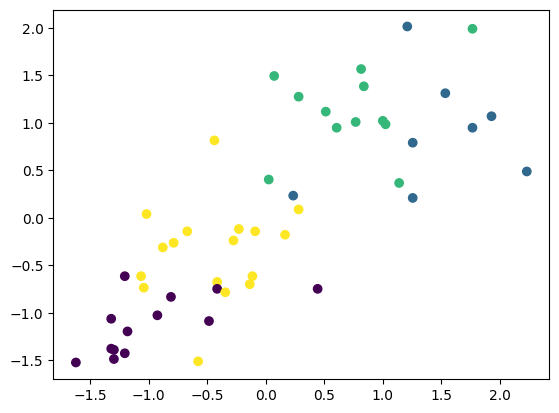

In [29]:
plt.scatter(df_USArrests_scaled['Murder'], df_USArrests_scaled['Assault'], c=df_USArrests_scaled['cluster'])

##### Aplicando previamente PCA

Se implementa PCA

In [31]:
pca = PCA(n_components=2)
df_USArrests_pca = pca.fit_transform(df_USArrests_scaled.iloc[:, :-1])
df_USArrests_pca = pd.DataFrame(df_USArrests_pca, columns=['PC1', 'PC2'])

Graficamos PCA

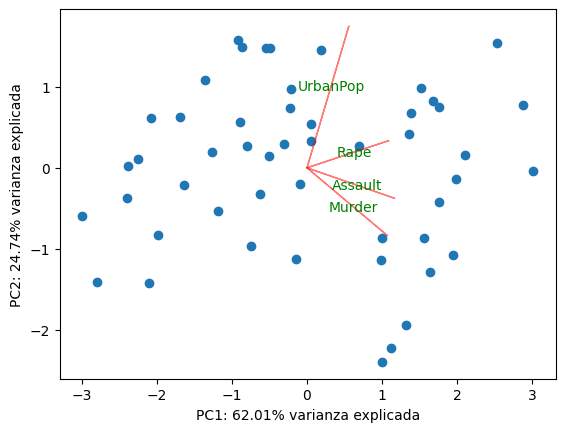

In [40]:
plt.scatter(df_USArrests_pca['PC1'], df_USArrests_pca['PC2'])
# Etiquetas de ejes
explained_variance = pca.explained_variance_ratio_
plt.xlabel(f'PC1: {explained_variance[0]:.2%} varianza explicada')
plt.ylabel(f'PC2: {explained_variance[1]:.2%} varianza explicada')
# Incluir vectores de los componentes principales
for i in range(pca.components_.shape[1]):  # Iterar sobre las columnas de pca.components_
    comp1 = pca.components_[0, i]  # Primer componente principal
    comp2 = pca.components_[1, i]  # Segundo componente principal
    plt.arrow(0, 0, comp1*2, comp2*2, color='r', alpha=0.5)  # Dibujar flecha para el componente principal
    plt.text(comp1 * 1.15, comp2 * 1.15, df_USArrests.columns[i+1], color='g', ha='center', va='center')  # Etiquetar el componente principal

Se aplica KMeans

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42) # Crear instancia de KMeans con 4 clusters y semilla 42
kmeans.fit(df_USArrests_pca)    # Ajustar el modelo KMeans a los datos (sin la columna 'State')
df_USArrests_pca['cluster'] = kmeans.labels_ # Añadir las etiquetas de los clusters al DataFrame escalado

df_USArrests_pca.head(5)

,PC1,PC2,cluster
0,0.985566,-1.133392,2
1,1.950138,-1.073213,2
2,1.763164,0.745957,1
3,-0.141420,-1.119797,2
4,2.523980,1.542934,1


Graficamos

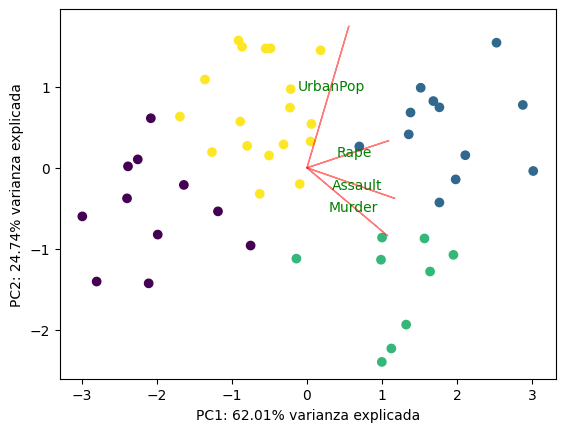

In [41]:
plt.scatter(df_USArrests_pca['PC1'], df_USArrests_pca['PC2'], c=df_USArrests_pca['cluster'])
# Etiquetas de ejes
explained_variance = pca.explained_variance_ratio_
plt.xlabel(f'PC1: {explained_variance[0]:.2%} varianza explicada')
plt.ylabel(f'PC2: {explained_variance[1]:.2%} varianza explicada')
# Incluir vectores de los componentes principales
for i in range(pca.components_.shape[1]):  # Iterar sobre las columnas de pca.components_
    comp1 = pca.components_[0, i]  # Primer componente principal
    comp2 = pca.components_[1, i]  # Segundo componente principal
    plt.arrow(0, 0, comp1*2, comp2*2, color='r', alpha=0.5)  # Dibujar flecha para el componente principal
    plt.text(comp1 * 1.15, comp2 * 1.15, df_USArrests.columns[i+1], color='g', ha='center', va='center')  # Etiquetar el componente principal

#### Pruebas de distintos valores de k

##### Aplicando método del codo

In [64]:
def metodo_codo(df, max_clusters):
    
    sse = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        sse.append(kmeans.inertia_)
    plt.plot(range(2, max_clusters), sse)
    plt.xlabel('Numero de clusters')
    plt.ylabel('SSE')
    plt.title('Metodo del codo')
    plt.show()

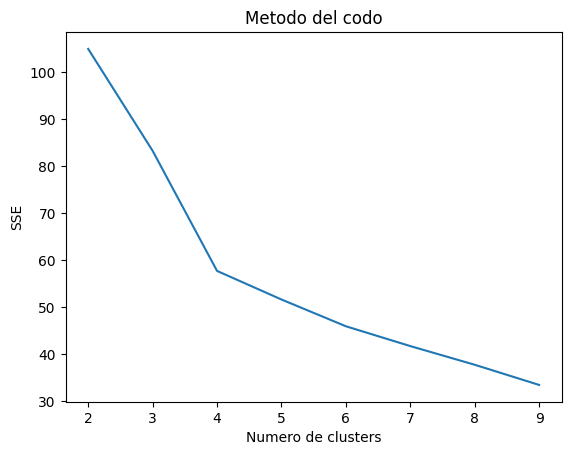

In [65]:
metodo_codo(df_USArrests_scaled.iloc[:,:-1], 10)

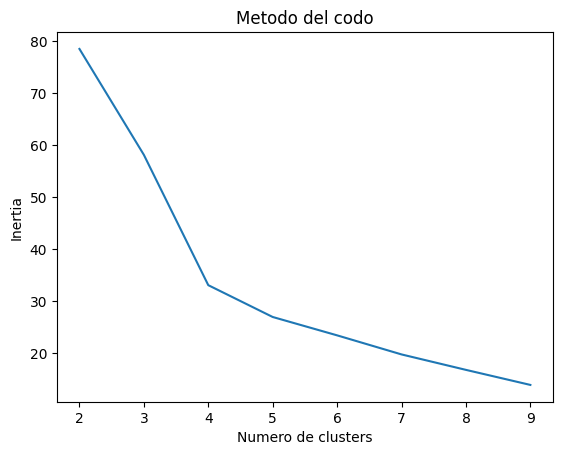

In [59]:
metodo_codo(df_USArrests_pca.iloc[:,:-1], 10)

##### Aplicando índice de Silueta

In [61]:
def metodo_silueta(df, max_clusters):
    
    silhouette = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df)
        silhouette.append(silhouette_score(df, kmeans.labels_))
    plt.plot(range(2, max_clusters), silhouette)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Silhouette')
    plt.title('Metodo de la silueta')
    plt.show()

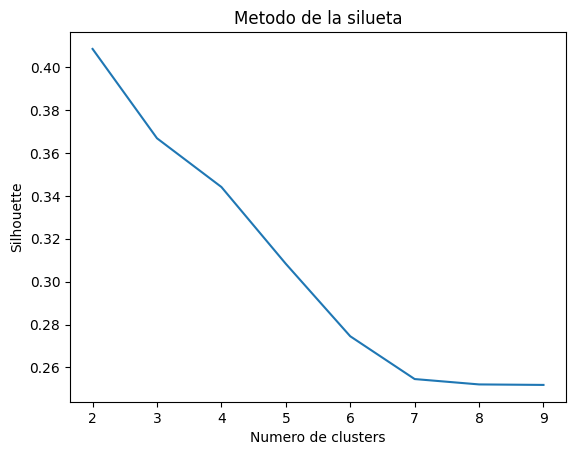

In [62]:
metodo_silueta(df_USArrests_scaled.iloc[:,:-1], 10)

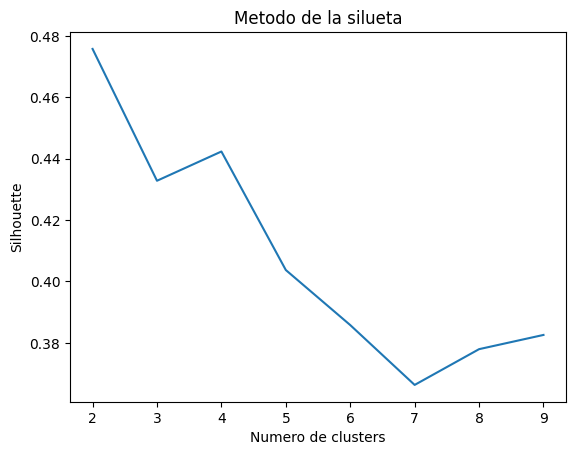

In [63]:
metodo_silueta(df_USArrests_pca.iloc[:,:-1], 10)